<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE</span></p>
<p><font size="4"> UE OPTAI </font></p>
<p></p>
<p><font size="5">  LAB - SVM and duality - Solution </font>
</br></p>
<p><font size="5"> Student Name: ZHANG Zuoyu </font>
</p></br>
</p>
</CENTER>

----------------------------


### SVM 

I - Let us consider the data set supplied below here and consisting in two classes. Note that the code supplied here is in Julia but you can do the lab in Python. 

II - Consider the dual problem of SVM with softmargin and implement its solution for kernel $k(x,x')=exp(\parallel x-x'\parallel^2/\sigma^2)$, with $\sigma^2=1$. Set the regularization parameter $\lambda$ equal to 1. Implement a gradient algorithm followed at each iteration by a projection on the set of constraints. Gradient stepsize $\mu=.01$ should be OK.

III - visualize the two decision areas supplied by the algorithm and add the observations on the plot. For instance use a $30\times 30$ grid of points with markersize equal to 6 (plot parameter ms=6) over $[-10,10]\times[-10,10]$ and then plot the data with ms=4.

IV - Compute the percentage of good decisions for each class.

V - Study the influence of parameters $\sigma^2$ and $\lambda$.

VI - You can also consider other strategies for stepsize and other descent techniques to find the solution of the dual problem.


In [43]:
using Plots
using LinearAlgebra
using LinearAlgebra: norm2 
using Statistics

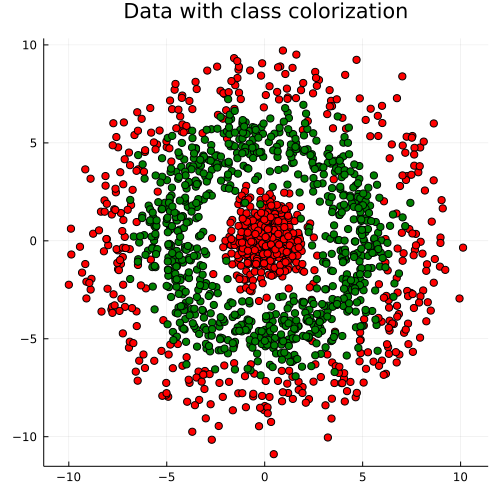

In [55]:
# I 

ns1,ns2     = 800,800  # number of samples per class
nc          = 2        # number of classes
ns1_2       = Int(ns1/2)
data1       = randn(2,ns1_2)
θ           = 2π*rand(ns1_2)
data1       = [data1  [8cos.(θ).+randn(ns1_2) 8sin.(θ).+randn(ns1_2)]']
θ           = 2π*rand(ns2)
data2       = [5cos.(θ).+randn(ns2) 5sin.(θ).+randn(ns2)]'

plot(size=(500,500),xmin=-10,xmax=10,ymin=-10,ymax=10)
plot!(data1[1,:],data1[2,:],color=:red, seriestype=:scatter,label="",ms=4)
plot!(data2[1,:],data2[2,:],color=:green, seriestype=:scatter,label="",ms=4)
plot!(xmin=-6,xmax=6,ymin=-6,ymax=6)
plot!(title="Data with class colorization", fontsize=20,ratio=1)

#savefig("data.png")

II - Consider the dual problem of SVM with softmargin and implement its solution for kernel $k(x,x')=exp(\parallel x-x'\parallel^2/\sigma^2)$, with $\sigma^2=1$. Set the regularization parameter $\lambda$ equal to 1. Implement a gradient algorithm followed at each iteration by a projection on the set of constraints. Gradient stepsize $\mu=.01$ should be OK.

The dual problem of SVM with soft margin can be formulated as:

maximize $W(\alpha)=\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jk(\mathbf{x_i},\mathbf{x_j})$

subject to $0\leq \alpha_i\leq \lambda$ for $i=1,...,n$, and $\sum_{i=1}^n\alpha_iy_i=0$

For the specific kernel $k(x,x')=exp(-\parallel x-x'\parallel^2/\sigma^2)$, with $\sigma^2=1$, the dual problem can be solved using the following steps:

Initialize $\alpha_i$ to 0 for $i=1,...,n$

Repeat until convergence:

Calculate the gradient of $W(\alpha)$ as $\nabla W(\alpha) = \mathbf{1} - \mathbf{y}\mathbf{y}^T\mathbf{K}\mathbf{\alpha}$, where $\mathbf{1}$ is an $n$-dimensional vector of ones, $\mathbf{y}$ is an $n$-dimensional vector of labels, $\mathbf{K}$ is the $n \times n$ kernel matrix with elements $K_{ij} = k(\mathbf{x_i}, \mathbf{x_j})$, and $\mathbf{\alpha}$ is an $n$-dimensional vector of dual variables.

Update $\alpha$ using the gradient descent step $\alpha_{t+1} = \mathrm{Proj}{[0, \lambda]^n}\mathrm{Proj}{[Orthogonal C]}(\alpha_t + \mu \nabla W(\alpha_t))$, where $\mathrm{Proj}{[0, \lambda]^n}$ denotes the projection onto the hypercube $[0, \lambda]^n$.
The primal solution can be obtained as $\mathbf{w}=\sum_{i=1}^n\alpha_iy_i\mathbf{x_i}$ and $b=y_i-\mathbf{w}^T\mathbf{x_i}$ for any $i$ such that $0<\alpha_i<\lambda$.
Here, we set the regularization parameter $\lambda$ to 1 and the gradient step size $\mu = 0.01$.

In another way, we can design the objective function with Penalty function that in form of:

minimize $W(\alpha)_t=\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jk(\mathbf{x_i},\mathbf{x_j}) + t(\alpha^T C)^2$

subject to $0\leq \alpha_i\leq \lambda$ for $i=1,...,n$

We can also repeat until convergence:

Calculate the gradient of $W(\alpha)_t$ as $\nabla W(\alpha)_t = \mathbf{y}\mathbf{y}^T\mathbf{K}\mathbf{\alpha}- \mathbf{1} + 2t(\alpha^T C)C$, where $\mathbf{1}$ is an $n$-dimensional vector of ones, $\mathbf{y}$ is an $n$-dimensional vector of labels, $\mathbf{K}$ is the $n \times n$ kernel matrix with elements $K_{ij} = k(\mathbf{x_i}, \mathbf{x_j})$, and $\mathbf{\alpha}$ is an $n$-dimensional vector of dual variables.

Update $\alpha$ using the gradient descent step $\alpha_{k+1} = \mathrm{Proj}{[0, \lambda]^n}(\alpha_k - \mu \nabla W_t(\alpha_k))$, where $\mathrm{Proj}{[0, \lambda]^n}$ denotes the projection onto the hypercube $[0, \lambda]^n$.
The primal solution can be obtained as $\mathbf{w}=\sum_{i=1}^n\alpha_iy_i\mathbf{x_i}$ and $b=y_i-\mathbf{w}^T\mathbf{x_i}$ for any $i$ such that $0<\alpha_i<\lambda$.
Here, we set the regularization parameter $\lambda$ to 1 and the gradient step size $\mu = 0.01$.

In [40]:
#define the kernel function
function gaussiankernel(x, y, σ = 1.0)
    return exp(-norm2(x-y)/σ^2)
end

gaussiankernel (generic function with 2 methods)

In [59]:
# II
#generate the data xx and labels cc
n_data = ns1+ns2
data = [data1 data2]'
cc = [-1*ones(1,ns1) ones(1,ns2)]'

#Initialisation for the parameters
λ = 1
μ = 0.01
σ = 1
α = zeros(n_data, 1);

In [49]:
function svm_dual_softmargin_PGD(x, y, λ, mu=0.01, σ=1.0, e=1e-8, max_iter=1000)
    m, n = size(x)
    alpha = zeros(m)
    alpha = zeros(m)
    old_alpha = ones(m)
    nb_iter = 0

    while nb_iter<max_iter && norm2(alpha-old_alpha)>e
        nb_iter = nb_iter + 1
        old_alpha = alpha
        # compute gradient
        grad = ones(m) - y .* (alpha .* [gaussiankernel(x[i,:], x[j,:], ) for i=1:m, j=1:m]) * y
        # update dual variables
        alpha += mu * grad
        # project onto feasible set
        alpha = max.(0, min.(λ, alpha))
        alpha = alpha .- (sum(alpha .* y) / sum(y.^2)) .* y
    end

    # compute support vectors
    sv_idx = findall(0 .< alpha .< λ)

    # compute bias
    b = mean(y[sv_idx] .- [gaussiankernel(x[sv_idx[i],:], x[sv_idx[1],:], σ) for i=1:length(sv_idx)])
    println("The number of iter is: $nb_iter")
    return(alpha, b)
end


svm_dual_softmargin_PGD (generic function with 5 methods)

In [7]:
alpha, b = svm_dual_softmargin_PGD(data, cc, λ)

The number of iter is: 500


([0.0810667444108262; 0.06018547550815428; … ; 0.6551509089666754; 0.30194651966855124;;], -0.22562185234632307)

In [45]:
function rbind(A,B)
    X = vcat(A,B)
    return(X)
end

rbind (generic function with 1 method)

In [33]:
function predict(data, cc, alpha, b)
    label = zeros(n_data, 1)
    data_1 = zeros(1, 2)
    data_2 = zeros(1, 2)
    K_matrix = [gaussiankernel(data[i,:], data[j,:], σ) for i=1:size(data)[1], j=1:size(data)[1]]

    for k=1:n_data
        label[k] = sign(sum(alpha .* cc .* K_matrix[k,:]) + b)
        if(label[k]==1)
            data_1 = rbind(data_1, data[k,:]')
        else
            data_2 = rbind(data_2, data[k,:]')
        end
    end
    return(data_1, data_2, label)
end

predict (generic function with 1 method)

In [10]:
data_1, data_2, label = predict(data, cc, alpha, b);

In [74]:
function svm_dual_softmargin_PGD_v2(x, y, λ, t=0.001, β = 1.1, mu=0.01, σ=1.0, e=1e-3, max_iter=45)
    m, n = size(x)
    alpha = zeros(m)
    alpha = zeros(m)
    old_alpha = ones(m)
    nb_iter = 0

    while nb_iter<max_iter && norm2(alpha-old_alpha)>e
        nb_iter = nb_iter + 1
        old_alpha = alpha
        # compute gradient
        #print(2 * t * (alpha' * y) .* y)
        grad =  y .* (alpha .* [gaussiankernel(x[i,:], x[j,:], ) for i=1:m, j=1:m]) * y - ones(m) + 2 * t * (alpha' * y) .* y
        # update dual variables
        alpha -= mu * grad
        # project onto feasible set
        alpha = max.(0, min.(λ, alpha))
        t = t * β
    end

    # compute support vectors
    sv_idx = findall(0 .< alpha .< λ)

    # compute bias
    b = mean(y[sv_idx] .- [gaussiankernel(x[sv_idx[i],:], x[sv_idx[1],:], σ) for i=1:length(sv_idx)])
    println("The number of iter is: $nb_iter")
    return(alpha, b)
end

svm_dual_softmargin_PGD_v2 (generic function with 7 methods)

In [75]:
alpha, b = svm_dual_softmargin_PGD_v2(data, cc, λ)

The number of iter is: 45


([0.00624578152141939; 0.0029602586423175445; … ; 0.12049911251406425; 0.07926399344916528;;], -0.12657431320045331)

In [76]:
data_1, data_2, label = predict(data, cc, alpha, b);

III - visualize the two decision areas supplied by the algorithm and add the observations on the plot. For instance use a $30\times 30$ grid of points with markersize equal to 6 (plot parameter ms=6) over $[-10,10]\times[-10,10]$ and then plot the data with ms=4.

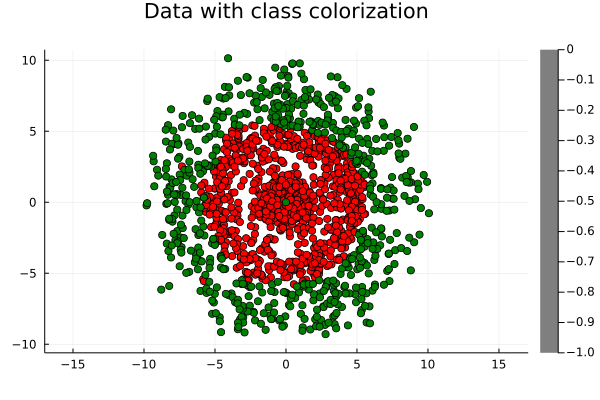

Arrays have incorrect length or dimension.


In [77]:
# Generate a grid of points
x1range = range(-10, stop=10, length=30)
x2range = range(-10, stop=10, length=30)
xx = repeat(x1range, 1, length(x2range))
yy = repeat(x2range, length(x1range), 1)
Xgrid = [xx[:] yy[:]]

n,d = size(data)

Kgrid = [gaussiankernel(Xgrid[i,:], data[j,:], 1) for i=1:size(Xgrid,1), j=1:n]
ygrid = sign.(Kgrid * (α .* cc) .+ b)

plot(data_1[:,1],data_1[:,2],color=:red, seriestype=:scatter,label="",ms=4)
plot!(data_2[:,1],data_2[:,2],color=:green, seriestype=:scatter,label="",ms=4)
plot!(xmin=-6,xmax=6,ymin=-6,ymax=6)
plot!(title="Data with class colorization", fontsize=20,ratio=1)
contourf!(xx, yy, reshape(ygrid, size(xx)), colors="k", linewidths=6, levels=[-1,0,1], alpha=0.5)

IV - Compute the percentage of good decisions for each class.

In [78]:
println("the percentage of good decisions for all class is: $(sum(label .== cc)/n_data)")
println("the percentage of good decisions for class 1 is: $(sum(label .== cc .== 1)/sum(cc .== 1))")
println("the percentage of good decisions for class -1 is: $(sum(label .== cc .== -1)/sum(cc .== -1))")

the percentage of good decisions for all class is: 0.62125
the percentage of good decisions for class 1 is: 0.745
the percentage of good decisions for class -1 is: 0.4975


V - Study the influence of parameters $\sigma^2$ and $\lambda$.

In [82]:
σ_list = [0.5,1,2,10,100]
λ_list = [0.1, 1, 2, 10, 100];

In [83]:
for λ in λ_list
    alpha, b = svm_dual_softmargin_PGD_v2(data, cc, λ)
    data_1, data_2, label = predict(data, cc, alpha, b)
    println("When lambda is $(λ) the percentage of good decisions for all class is: $(sum(label .== cc)/n_data)")
    println("When lambda is $(λ) the percentage of good decisions for class 1 is: $(sum(label .== cc .== 1)/sum(cc .== 1))")
    println("When lambda is $(λ) the percentage of good decisions for class -1 is: $(sum(label .== cc .== -1)/sum(cc .== -1))")
end

The number of iter is: 45
When lambda is 0.1 the percentage of good decisions for all class is: 0.905625
When lambda is 0.1 the percentage of good decisions for class 1 is: 0.96875
When lambda is 0.1 the percentage of good decisions for class -1 is: 0.8425
The number of iter is: 45
When lambda is 1.0 the percentage of good decisions for all class is: 0.62125
When lambda is 1.0 the percentage of good decisions for class 1 is: 0.745
When lambda is 1.0 the percentage of good decisions for class -1 is: 0.4975
The number of iter is: 45
When lambda is 2.0 the percentage of good decisions for all class is: 0.565
When lambda is 2.0 the percentage of good decisions for class 1 is: 0.68125
When lambda is 2.0 the percentage of good decisions for class -1 is: 0.44875
The number of iter is: 45
When lambda is 10.0 the percentage of good decisions for all class is: 0.475
When lambda is 10.0 the percentage of good decisions for class 1 is: 0.51625
When lambda is 10.0 the percentage of good decisions f

In [84]:
for σ in σ_list
    λ = 1
    alpha, b = svm_dual_softmargin_PGD_v2(data, cc, λ, 0.01, σ)
    data_1, data_2, label = predict(data, cc, alpha, b)
    println("When sigma is $(σ) the percentage of good decisions for all class is: $(sum(label .== cc)/n_data)")
    println("When sigma is $(σ) the percentage of good decisions for class 1 is: $(sum(label .== cc .== 1)/sum(cc .== 1))")
    println("When sigma is $(σ) the percentage of good decisions for class -1 is: $(sum(label .== cc .== -1)/sum(cc .== -1))")
end

The number of iter is: 45
When sigma is 0.5 the percentage of good decisions for all class is: 0.483125
When sigma is 0.5 the percentage of good decisions for class 1 is: 0.455
When sigma is 0.5 the percentage of good decisions for class -1 is: 0.51125
The number of iter is: 45
When sigma is 1.0 the percentage of good decisions for all class is: 0.58625
When sigma is 1.0 the percentage of good decisions for class 1 is: 0.6725
When sigma is 1.0 the percentage of good decisions for class -1 is: 0.5
The number of iter is: 45
When sigma is 2.0 the percentage of good decisions for all class is: 0.0
When sigma is 2.0 the percentage of good decisions for class 1 is: 0.0
When sigma is 2.0 the percentage of good decisions for class -1 is: 0.0
The number of iter is: 45
When sigma is 10.0 the percentage of good decisions for all class is: 0.0
When sigma is 10.0 the percentage of good decisions for class 1 is: 0.0
When sigma is 10.0 the percentage of good decisions for class -1 is: 0.0
The number 

**Analysis of results**

From the accuracy of the final results with different values of λ and σ, it is clear that the values of both have a great influence on the final classification results. For our experimental data, the results are better when λ is taken as 0.1 and σ is taken as 1. For our data points, the interval between the data is very small, the data is dense and the segmentation boundary is not very clear to divide all the points successfully, so a smaller λ value may be beneficial to the results of the algorithm. Also σ represents the variance of the Gaussian kernel function, which indicates the magnitude of the data distribution and requires several attempts to derive the results


VI - You can also consider other strategies for stepsize and other descent techniques to find the solution of the dual problem.

For solving the dual problem of SVM, here is a very classical algorithm called SMO. The basic idea of the SMO algorithm is that since each αi corresponds to a sample point (xi,yi), the solution of this optimization problem is obtained if the solutions of all variables satisfy the KKT condition. This is because the KKT condition is a sufficient necessary condition for this optimization problem.

Here is the reference for the SMO algorithm:

https://en.wikipedia.org/wiki/Sequential_minimal_optimization

In [50]:
# SMO algorithm for dual problem of SVM with Gaussian kernel
function svm_dual_softmargin_smo(X, y, λ=1.0, σ=1.0, tol=1e-3, max_iter=1000)
    # compute kernel matrix
    n, d = size(X)
    K = zeros(n, n)
    for i in 1:n, j in 1:n
        K[i, j] = gaussiankernel(X[i, :], X[j, :], σ)
    end
    
    # initialize alpha and b
    alpha = zeros(n)
    b = 0.0
    
    # initialize E and eta
    E = copy(y)
    eta = 0.0
    
    # set up convergence flag
    converged = false
    iter = 0
    
    # run SMO algorithm
    while (!converged && iter < max_iter)
        num_changed_alphas = 0
        
        for i in 1:n
            # compute Ei = f(xi) - yi
            E[i] = dot(alpha .* y, K[:, i]) + b - y[i]
            
            # check if alpha[i] violates KKT condition
            if ((y[i] * E[i] < -tol && alpha[i] < λ) || (y[i] * E[i] > tol && alpha[i] > 0))
                # select a second alpha j to optimize with alpha[i]
                j = rand(1:n)
                while (j == i)
                    j = rand(1:n)
                end
                # compute Ej = f(xj) - yj
                E[j] = dot(alpha .* y, K[:, j]) + b - y[j]
                
                # save old alpha values
                alpha_i_old = alpha[i]
                alpha_j_old = alpha[j]
                
                # compute L and H bounds for alpha[j]
                if (y[i] != y[j])
                    L = max(0, alpha[j] - alpha[i])
                    H = min(λ, λ + alpha[j] - alpha[i])
                else
                    L = max(0, alpha[i] + alpha[j] - λ)
                    H = min(λ, alpha[i] + alpha[j])
                end
                
                # check if L and H are equal
                if (L == H)
                    continue
                end
                
                # compute eta = 2 * K[i, j] - K[i, i] - K[j, j]
                eta = 2.0 * K[i, j] - K[i, i] - K[j, j]
                if (eta >= 0)
                    continue
                end
                
                # compute new value for alpha[j]
                alpha[j] = alpha[j] - (y[j] * (E[i] - E[j])) / eta
                alpha[j] = min(max(alpha[j], L), H)
                
                # check if alpha[j] has changed significantly
                if (abs(alpha[j] - alpha_j_old) < tol)
                    continue
                end
                
                # compute new value for alpha[i
                alpha[i] = alpha[i] + y[i] * y[j] * (alpha_j_old - alpha[j])
                
                # update bias term b
                b1 = b - E[i] - y[i] * (alpha[i] - alpha_i_old) * K[i, i] - y[j] * (alpha[j] - alpha_j_old) * K[i, j]
                b2 = b - E[j] - y[i] * (alpha[i] - alpha_i_old) * K[i, j] - y[j] * (alpha[j] - alpha_j_old) * K[j, j]
                if (0 < alpha[i] && alpha[i] < λ)
                    b = b1
                elseif (0 < alpha[j] && alpha[j] < λ)
                    b = b2
                else
                    b = (b1 + b2) / 2.0
                end
                
                num_changed_alphas += 1
            end
        end
        
        if (num_changed_alphas == 0)
            converged = true
        end
        iter += 1
    end
    # compute support vectors and weights
    sv = (alpha .> 0)
    
    # return support vectors, weights, and bias term
    return alpha, sv, b
end

svm_dual_softmargin_smo (generic function with 5 methods)

In [60]:
# run SVM with SMO algorithm and visualize results
alpha, sv, b = svm_dual_softmargin_smo(data, cc)
data_1, data_2, label = predict(data, cc, alpha, b)

([0.0 0.0; 2.3933178279830063 -3.012203230749908; … ; 1.216641957108932 -4.211842091187704; -1.2932546368796392 -4.59176857455948], [0.0 0.0; -0.9434052968568208 2.8064304113778147; … ; -6.230427185874292 3.9043571148913734; 5.763723220896454 -5.613702766709048], [-1.0; -1.0; … ; 1.0; 1.0;;])

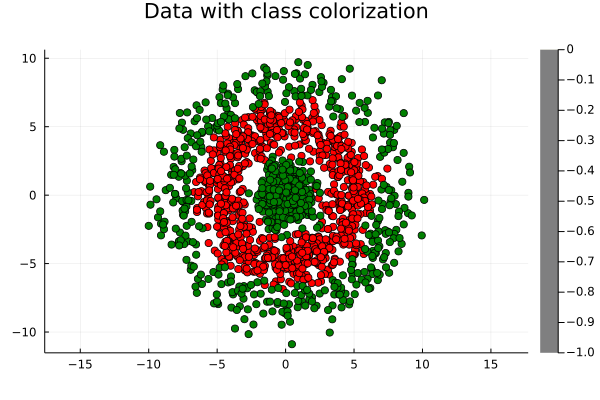

Arrays have incorrect length or dimension.


In [61]:
# Generate a grid of points
x1range = range(-10, stop=10, length=30)
x2range = range(-10, stop=10, length=30)
xx = repeat(x1range, 1, length(x2range))
yy = repeat(x2range, length(x1range), 1)
Xgrid = [xx[:] yy[:]]

n,d = size(data)

Kgrid = [gaussiankernel(Xgrid[i,:], data[j,:], 1) for i=1:size(Xgrid,1), j=1:n]
ygrid = sign.(Kgrid * (α .* cc) .+ b)

plot(data_1[:,1],data_1[:,2],color=:red, seriestype=:scatter,label="",ms=4)
plot!(data_2[:,1],data_2[:,2],color=:green, seriestype=:scatter,label="",ms=4)
plot!(xmin=-6,xmax=6,ymin=-6,ymax=6)
plot!(title="Data with class colorization", fontsize=20,ratio=1)
contourf!(xx, yy, reshape(ygrid, size(xx)), colors="k", linewidths=6, levels=[-1,0,1], alpha=0.5)

In [62]:
println("the percentage of good decisions for all class is: $(sum(label .== cc)/n_data)")
println("the percentage of good decisions for class 1 is: $(sum(label .== cc .== 1)/sum(cc .== 1))")
println("the percentage of good decisions for class -1 is: $(sum(label .== cc .== -1)/sum(cc .== -1))")

the percentage of good decisions for all class is: 0.965625
the percentage of good decisions for class 1 is: 0.9675
the percentage of good decisions for class -1 is: 0.96375


We can say that the SMO algorithm works very well and fast.